<a href="https://colab.research.google.com/github/ruslanavarra/Yandex.Practicum.-Data-Science/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%83%D0%B4%D0%BE%D1%8F%20%D0%BA%D0%BE%D1%80%D0%BE%D0%B2%20%D0%B8%20%D0%B2%D0%BA%D1%83%D1%81%D0%B0%20%D0%BC%D0%BE%D0%BB%D0%BE%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: Линейные модели в машинном обучении

## Описание проекта

По запросу молочного хозяйства "Вольный луг" в рамках проекта будет разработано две модели:

1) Первая будет прогнозировать возможный удой коровы

2) Вторая — рассчитывать вероятность получить вкусное молоко от коровы

С помощью станет возможно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным.

Полученные итоговые данные помогут эффективно и успешно расширить поголовье стада коров.

Для этого в рамках проекта мы займемся загрузкой и обработкой полученных данных, проведем исследовательский и статистический анализ и после чего будет проведено машинное обучение и сделаны итоговые выводы.

## Загрузка данных

In [ ]:
#импортируем все необходимые библиотеки

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    recall_score,
    precision_score,
    confusion_matrix,
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    accuracy_score
)

from math import sqrt
from scipy.stats import norm
from scipy import stats

!pip install phik -q
import phik

In [ ]:
try: df_ferma = pd.read_csv('/datasets/ferma_main.csv', sep=';') #загрузка данных
except: print("При загрузке произошла ошибка")

In [ ]:
df_ferma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [ ]:
#смена названия столбцов с кириллицы на латиницу и в одном регистре, для удобства

df_ferma.columns = ['id','yield','efu','raw_protein','spr','breed','pasture_type','dad_breed','fat_content','protein_content','milk_taste','age']

#Energy feed unit - энергетическая кормовая еденица, сокр. efu
#Sugar-protein ratio

In [ ]:
display(df_ferma.head(5)) #ознакомление

,id,yield,efu,raw_protein,spr,breed,pasture_type,dad_breed,fat_content,protein_content,milk_taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [ ]:
try: df_dad = pd.read_csv('/datasets/ferma_dad.csv',sep=';') #загрузка данных
except: print("При загрузке произошла ошибка")

In [ ]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [ ]:
df_dad.columns = ['id','dad_name'] #смена названия столбцов

In [ ]:
display(df_dad.head(5)) #ознакомление

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
try: df_cow_buy = pd.read_csv('/datasets/cow_buy.csv',sep=';') #загрузка данных
except: print("При загрузке произошла ошибка")

In [ ]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [ ]:
df_cow_buy.columns = ['breed','pasture_type','dad_breed','dad_name','fat_content','protein_content','age']  #смена названия столбцов

In [ ]:
display(df_cow_buy.head(5)) #ознакомление

,breed,pasture_type,dad_breed,dad_name,fat_content,protein_content,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


**Знакомство с данными**

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент.

**Описание данных:**

* id — уникальный идентификатор коровы.
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
* Сырой протеин, г — содержание сырого протеина в корме (в граммах).
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Жирность,% — содержание жиров в молоке (в процентах).
* Белок,% — содержание белков в молоке (в процентах).
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.

**Описание данных:**
* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

**Описание данных:**
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

В рамках последующей предобработки данных необходимо будет проверить таблицы на наличие пропусков (и обработать, при необходимости), привести данные к нижнему регистру, удалить возможные дупликаты и проверить/обработать аномальные значения

##  Предобработка данных

In [ ]:
#проверка на пропуски
display(df_ferma.isna().sum())
display(df_dad.isna().sum())
display(df_cow_buy.isna().sum())

#найден один пропуск в столбце с данными по удою коров

id                 0
yield              0
efu                0
raw_protein        0
spr                0
breed              0
pasture_type       0
dad_breed          0
fat_content        0
protein_content    0
milk_taste         0
age                0
dtype: int64

id          0
dad_name    0
dtype: int64

breed              0
pasture_type       0
dad_breed          0
dad_name           0
fat_content        0
protein_content    0
age                0
dtype: int64

In [ ]:
df_ferma['yield'].isna().sum()

df_ferma = df_ferma.loc[~df_ferma['yield'].isna()]

#найденный пропуск удален

In [ ]:
# проверка на явные дубликаты
display(df_ferma.duplicated().sum(), df_dad.duplicated().sum(), df_cow_buy.duplicated().sum())

5

0

4

In [ ]:
#удаление найденных дубликатов
df_ferma = df_ferma.drop_duplicates(subset=['id','breed'])

In [ ]:
#приведение к нижнему регистру

def lower(df):
    for col in df:
        df[col] = df[col].apply(lambda col: col.lower() if type(col) is str else col)

lower(df_cow_buy)
lower(df_dad)
lower(df_ferma)

In [ ]:
def check(df):
    for i in df.columns:
        print(i, df[i].unique())
check(df_ferma)
check(df_cow_buy)
check(df_dad)

#проверка неявных дубликатов
#было бы здорово добавить еще название df к каждому логу

id [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246

In [ ]:
#замена неявных дубликатов
df_ferma['milk_taste'] = df_ferma['milk_taste'].replace('не вкусно','не_вкусно')
df_ferma['pasture_type'] = df_ferma['pasture_type'].replace('равнинные','равнинное')
df_ferma['dad_breed'] = df_ferma['dad_breed'].replace('айдиалл','айдиал')
df_ferma['breed'] = df_ferma['breed'].replace('рефлешнсоверинг','рефлешн_соверинг')
df_cow_buy['breed'] = df_cow_buy['breed'].replace('рефлешнсоверинг','рефлешн_соверинг')
df_ferma['breed'] = df_ferma['breed'].replace('вис бик айдиал','вис_бик_айдиал')
df_cow_buy['breed'] = df_cow_buy['breed'].replace('вис бик айдиал','вис_бик_айдиал')

In [ ]:
#убираем аномальное значение в столбце 'yield'

df_ferma = df_ferma.loc[df_ferma['yield']!=45616]

In [ ]:
#проверка корректности типов столбцов в датафреймах, замена

df_ferma['efu'] = df_ferma['efu'].str.replace(',', '.').astype(float)
df_ferma['fat_content'] = df_ferma['fat_content'].str.replace(',', '.').astype(float)
df_ferma['protein_content'] = df_ferma['protein_content'].str.replace(',', '.').astype(float)
df_ferma['spr'] = df_ferma['spr'].str.replace(',', '.').astype(float)
df_cow_buy['fat_content'] = df_cow_buy['fat_content'].str.replace(',', '.').astype(float)
df_cow_buy['protein_content'] = df_cow_buy['protein_content'].str.replace(',', '.').astype(float)

In [ ]:
df_cow_buy['dad_name'] = df_cow_buy['dad_name'].apply(lambda col: col.lower() if type(col) is str else col)
df_dad['dad_name'] = df_dad['dad_name'].apply(lambda col: col.lower() if type(col) is str else col)

def lower(df):
    for col in df:
        df[col] = df[col].apply(lambda col: col.lower() if type(col) is str else col)

lower(df_cow_buy)
lower(df_dad)
lower(df_ferma)
#приведение данных к нижнему регистру

В результате предобработки был выявлен и удален один пропуск, 5 явных дубликатов, ряд неявных дубликатов. Также данные приведены к нижнему регистру, типы столбцов заменены на корректные и был найдено и удалено одно аномальное значение в столбце с удоем.

In [ ]:
# код ревьюера
df_cow_buy.duplicated().sum()

4

In [ ]:
df_ferma = df_ferma.set_index('id') #вынесение id в индекс

## Исследовательский анализ данных

Проведем статистический анализ всех признаков

In [ ]:
#распределим признаки по типу: численный/категориальный

cat_col = df_ferma[['breed', 'pasture_type', 'dad_breed', 'milk_taste', 'age']]
num_col = df_ferma[['efu', 'raw_protein', 'spr', 'fat_content', 'protein_content']]

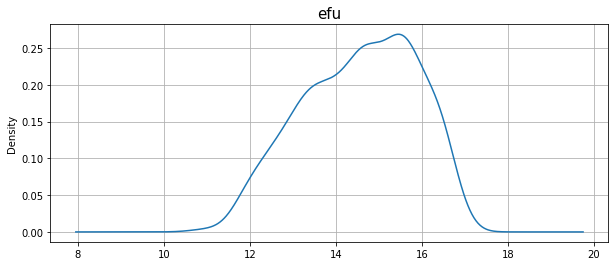

Средний показатель efu 14.55


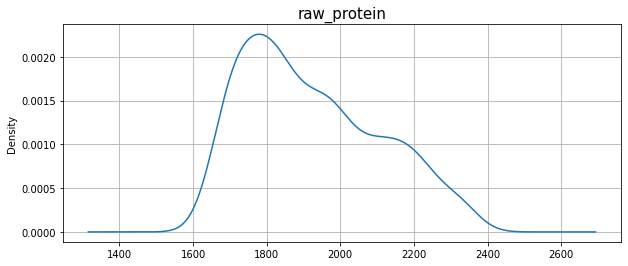

Средний показатель raw_protein 1923.76


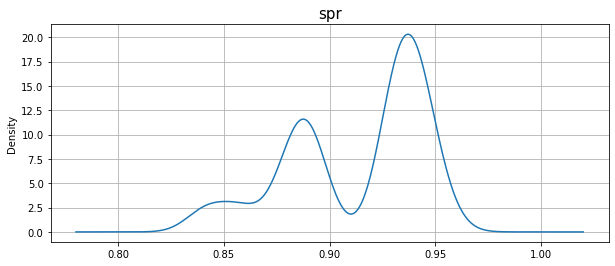

Средний показатель spr 0.91


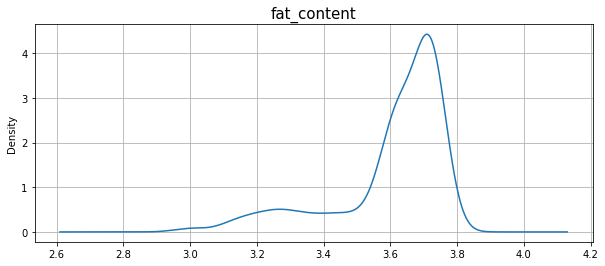

Средний показатель fat_content 3.6


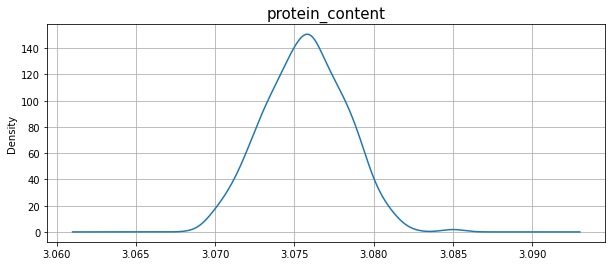

Средний показатель protein_content 3.08


In [ ]:
#построим графики для численных признаков
for col in num_col:
    ax = df_ferma[col].plot(kind='density',grid=True,figsize=(10,4))
    df_ferma[col].mean().astype(int)
    ax.set_title(col, fontsize=15)
    plt.show()
    print(f'Средний показатель {col}', round(df_ferma[col].mean(),2))

Графики yield,efu,raw_protein,fat_content,protein_content нормально распределены.

График spr имеет два пика 0.88 и 0.94.

Новых выбросов на графиках не обнаружено.

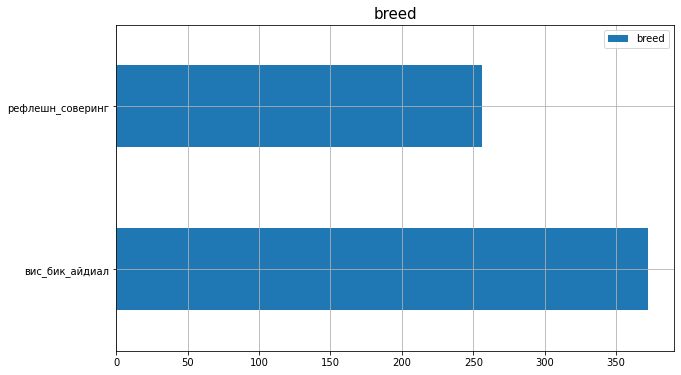

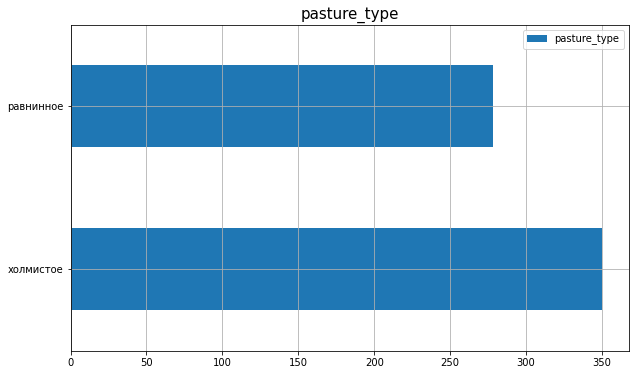

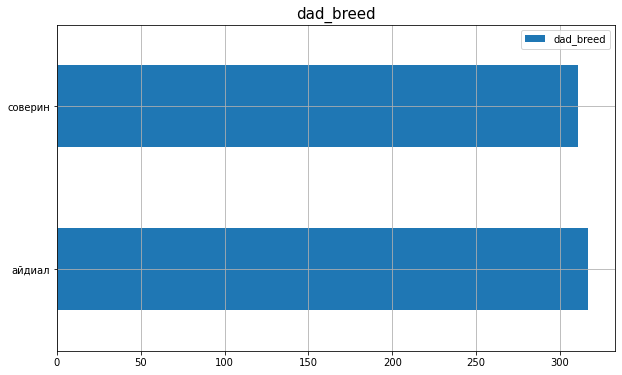

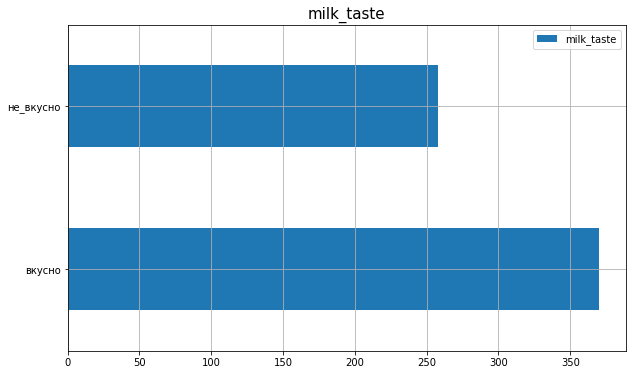

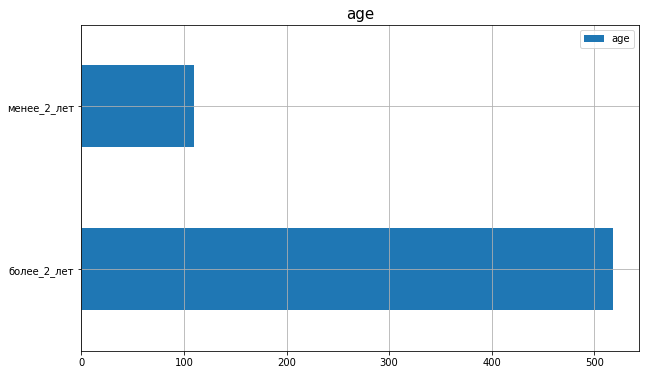

In [ ]:
#построим графики для категориальных признаков

for col in cat_col:
    ax = df_ferma[col].value_counts().plot(kind='barh', grid=True, figsize=(10,6), legend=True)
    ax.set_title(col, fontsize=15)
    plt.show()

На графиках видно:

* что породы отцов распределенны равномерно;

* коров возрастом более двух лет значительно больше, чем менее двух лет;

* вкусного молока производится чуть больше, чем невкусного;

* одной породы чуть больше, чем другой;

* холмистых пастбищ чуть больше, чем равнинных.


## Корреляционный анализ

###### Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками.

In [ ]:
df_ferma.corr(method='spearman', min_periods=1)

,yield,efu,raw_protein,spr,fat_content,protein_content
yield,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
efu,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
raw_protein,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
spr,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
fat_content,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
protein_content,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


Наблюдается высокая корреляция между признаками yield, spr, efu (0.75-0.8). Средняя корреляция у признака fat_content (0.68). Остальные признаки слабо связаны, либо не связаны вовсе.

###### Построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

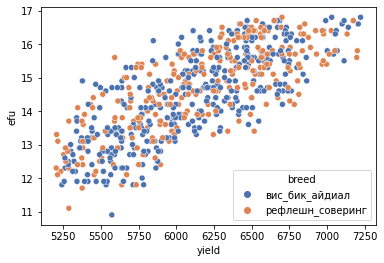

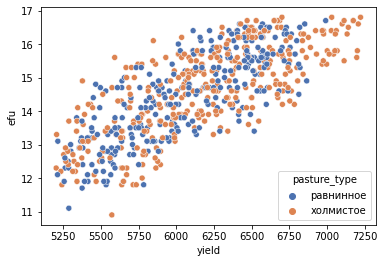

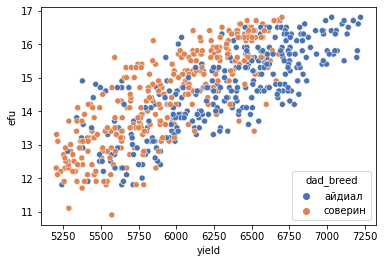

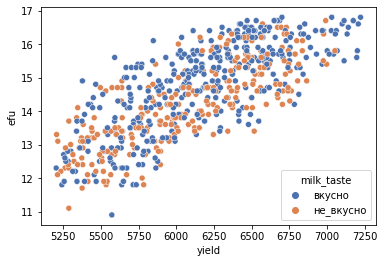

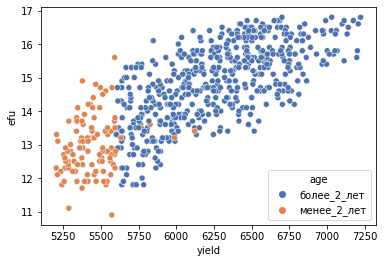

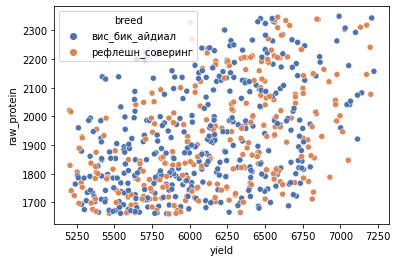

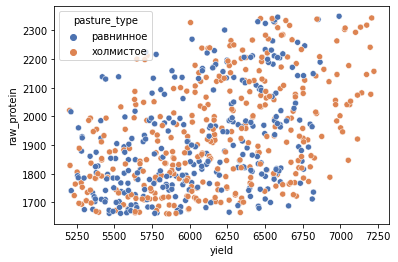

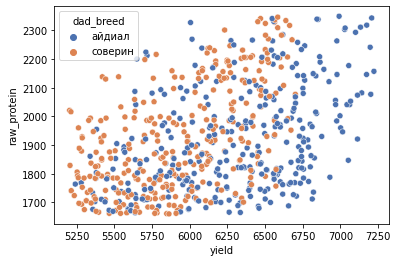

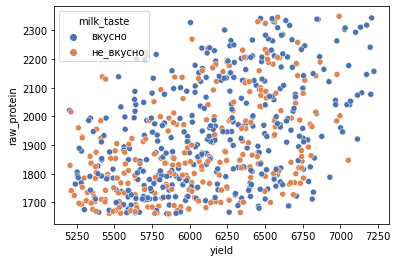

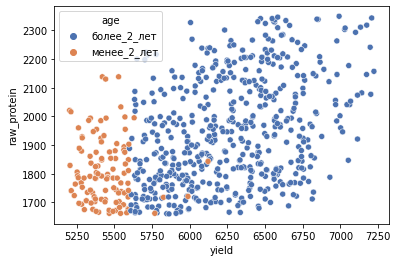

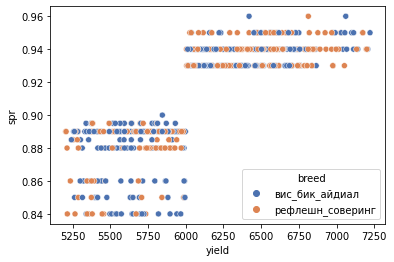

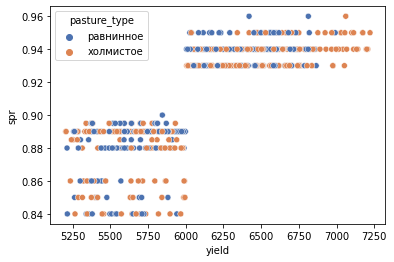

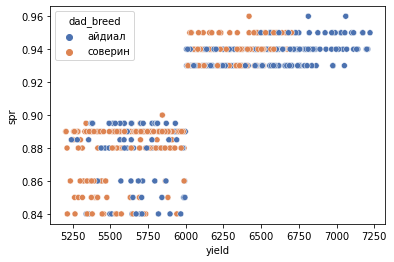

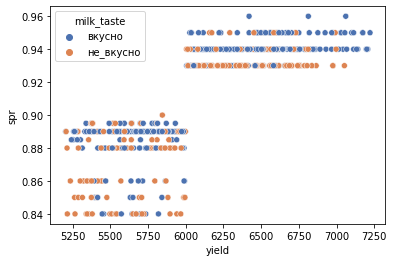

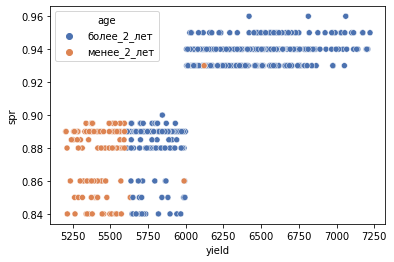

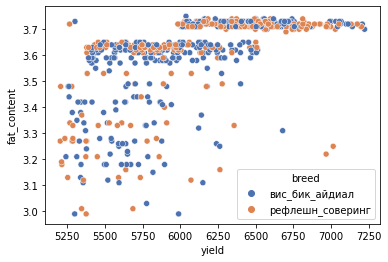

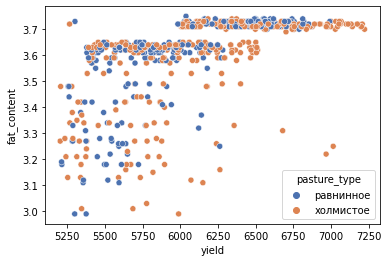

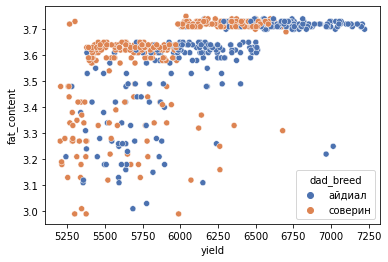

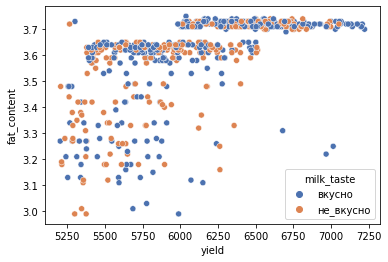

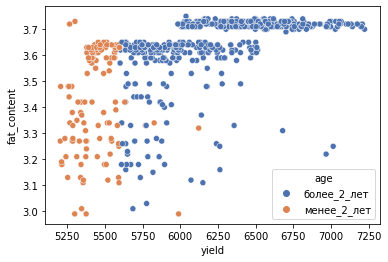

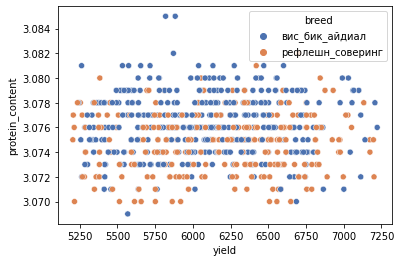

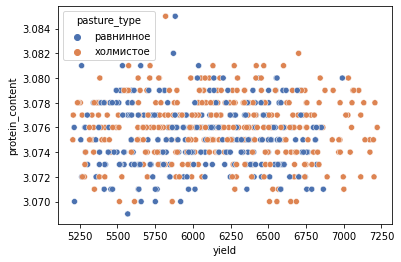

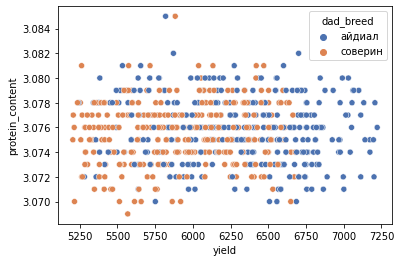

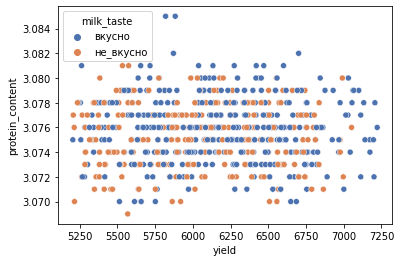

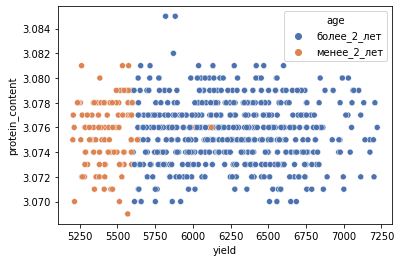

In [ ]:
for col in num_col:
    for col1 in cat_col:
        sns.scatterplot(data=df_ferma,x='yield',y=col,palette="deep",hue=col1)
        plt.show()

Сделанные графики подтверждают наши выводы. Но также можно заметить, что связь между многими входными и целевым признаком носит нелинейный характер. Так данное утверждение справедливо насчет признаков: protein_content, fat_content, spr.

Также можно заметить, что у  коров возрастом более 2х лет показатели удоя очевидно выше; также выше показатели удоя у коров с породой отца Айдиал и холмистым типом пастбищ.
    
Можно заметить линейно-квадратичную зависимость yield и efu. На графике с efu можно заметить два явных кластера с границей около значения 0.92, в будущем это может пригодиться.

В рамках подготовки данных для МО проблему с нелинейностью и зависимостью признаков можно решить путем изменения данных признаков (категоризации или полимеризации) и/или полного удаления из модели.

## Подготовка данных для МО

In [ ]:
# создание константы RANDOM_STATE и вынесение id в виде индекса
RANDOM_STATE = 42

In [ ]:
def prepare_data(df,y):

    # разделяем признаки на входные и целевой
    X = df.drop(columns=y)
    y = df[y]

    # делим данные на выборки
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=RANDOM_STATE,test_size=0.25)



    cat_col_names = X_train.select_dtypes(exclude='number').columns.tolist()
    num_col_names = X_train.select_dtypes(include='number').columns.tolist()


    #кодирование категориальных признаков
    ohe = OneHotEncoder(drop='first',sparse=False)
    X_train_ohe = ohe.fit_transform(X_train[cat_col_names])
    X_test_ohe = ohe.transform(X_test[cat_col_names])
    encoder_col_names = ohe.get_feature_names()

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    #масштабирование численных признаков
    scaler = StandardScaler()
    X_train[num_col_names] = scaler.fit_transform(X_train[num_col_names])
    X_test[num_col_names] = scaler.transform(X_test[num_col_names])

    #сброс индексов
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    #объединение признаков
    X_train = pd.concat((X_train[num_col_names],X_train_ohe),axis=1)
    X_test = pd.concat((X_test[num_col_names], X_test_ohe), axis=1)

    return X_train, X_test, y_train, y_test

## Обучение модели линейной регрессии

#### 1я модель линейной регрессии

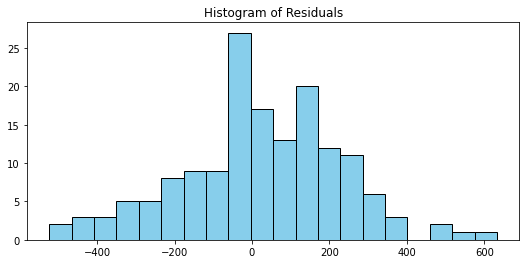

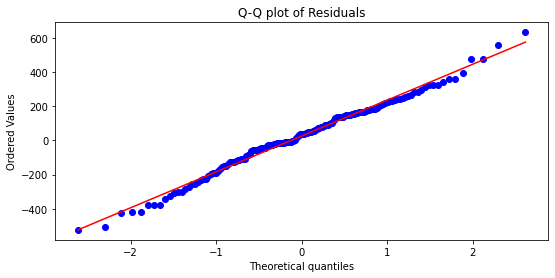

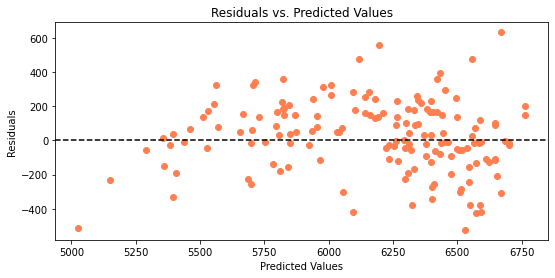

R2_SCORE: 0.784 MSE: 43887.02 MAE 164.24 RMSE 209.49


In [ ]:
# создаём модель, обучаем её и получаем прогнозные значения

df_ferma_l1 = df_ferma.copy().drop(['fat_content','protein_content','milk_taste'],axis=1)

X_train, X_test, y_train, y_test = prepare_data(df_ferma_l1,'yield')

reg = LinearRegression().fit(X_train,y_train)

y_pred1 = reg.predict(X_test)

y_pred1 = pd.Series(y_pred1)

def scores(y_pred):
    r2 = r2_score(y_test, y_pred),
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = sqrt(mse)
    residuals = (y_pred - y_test).to_numpy()


    # Гистограмма остатков
    plt.figure(figsize=(30,4))
    plt.subplot(1, 3, 1)
    plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of Residuals')


    ## График Q-Q plot для нормальности распределения
    plt.figure(figsize=(30,4))
    plt.subplot(1, 3, 2)
    stats.probplot(residuals.flatten(), dist="norm", plot=plt)
    plt.title('Q-Q plot of Residuals')


    # График остатков относительно среднего
    plt.figure(figsize=(30,4))
    plt.subplot(1, 3, 3)
    plt.scatter(y_pred, residuals, color='coral')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    plt.show()


    print('R2_SCORE:',round(r2[0],3),
          'MSE:',round(mse,2),
         'MAE',round(mae,2),
         'RMSE',round(rmse,2),end='\n')


scores(y_pred1)

#добавить признаки

Метрика R2 по первой модели дала результат 0.796. Попробуем улучшить данный результат.
У графика остатков есть небольшое смещение в правую сторону, предсказанные значения в среднем имеют большую величину, чем фактические. Левая сторона распределена более равномерно.

Попробуем убрать из модели признаки fat_content, protein_content, milk_taste, как имеющие слабую зависимость с целевым yield.

А efu и spr заменим на полимеризированный и категоризированный соответственно, попробовав исключить мультиколлинеарность.

#### 2я модель линейной регрессии

In [ ]:
df_ferma_l2 = df_ferma_l1.copy()

#полимеризация EFU
df_ferma_l2['efu^2'] = df_ferma_l2['efu']**2

#преобразование СПО в категориальный бинарный признак, используем обнаруженную границу между кластерами на графике
df_ferma_l2['spr2'] = 2
df_ferma_l2.loc[df_ferma_l2['spr']<=0.92,'spr2'] = 0
df_ferma_l2.loc[df_ferma_l2['spr']>0.92,'spr2'] = 1

#удаление лишних признаков
df_ferma_l2 = df_ferma_l2.drop(['efu','spr'],axis=1)

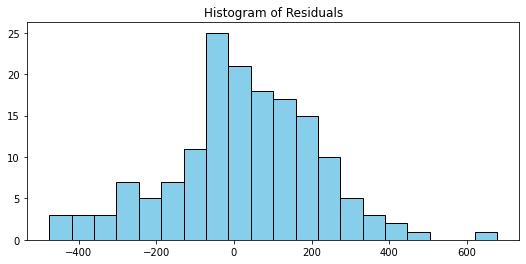

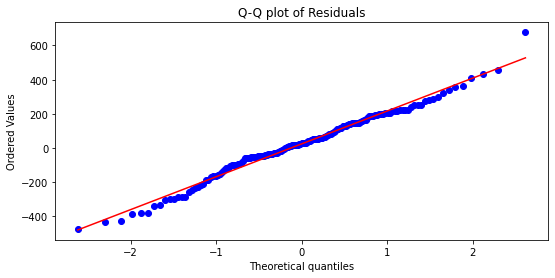

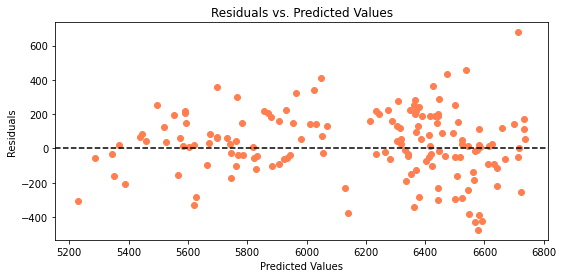

R2_SCORE: 0.818 MSE: 37030.91 MAE 149.04 RMSE 192.43


In [ ]:
X_train, X_test, y_train, y_test = prepare_data(df_ferma_l2,'yield')

reg = LinearRegression().fit(X_train,y_train)

y_pred2 = reg.predict(X_test)

y_pred2 = pd.Series(y_pred2)

scores(y_pred2)

Результат метрики R2 и остальных метрик немного улучшился. Данная модель показала чуть лучший результат.

Теперь распределение остатков более нормально с правой стороны (у положительных отклонений), нежели слева, где наблюдается большое количество небольших отклонений.

Для третьей модели мы добавим данные связанные с породами отцов.

#### 3я модель линейной регрессии

In [ ]:
#добавим столбец с информацией о породах отцов

df_ferma_l3 = df_ferma_l2.copy()

df_ferma_l3 = df_ferma_l3.merge(df_dad, on='id')

df_ferma_l3 = df_ferma_l3.set_index('id')

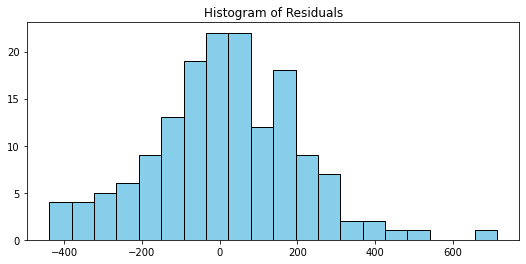

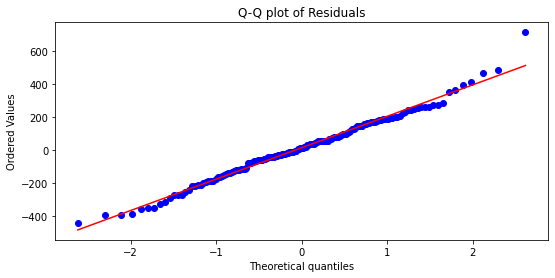

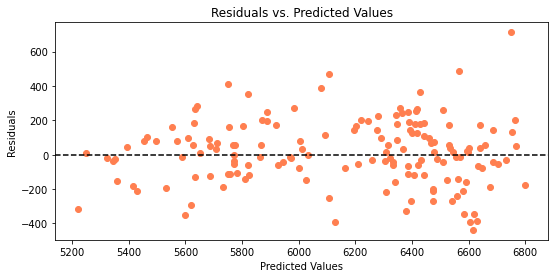

R2_SCORE: 0.825 MSE: 35673.89 MAE 146.16 RMSE 188.88


In [ ]:
X_train, X_test, y_train, y_test = prepare_data(df_ferma_l3,'yield')

reg = LinearRegression().fit(X_train,y_train)

y_pred3 = reg.predict(X_test)

y_pred3 = pd.Series(y_pred3)


scores(y_pred3)

Третья модель показала наилучший результат по метрикам, хоть и не сильно ушла от остальных. График распределения остатков близок к нормальному с небольшим пиком у положительных отклонений в области диапазона значений 150-200.

In [ ]:
print('95% доверительный интервал =', stats.norm.interval(confidence=0.95, loc = np.mean(y_pred3), scale=stats.sem(y_pred3)))

95% доверительный интервал = (6092.340075854289, 6221.375070058381)


#### Прогноз удоя коров, предназначенных для покупки

С помощью 3-й модели спрогнозируем удой коров, которых фермер рассматривает к покупке.

In [ ]:
#Добавим недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): взяты средние значения каждого из признаков и увеличены их на 5%.

df_cow_buy['spr'] = df_ferma['spr'].mean() * 1.05
df_cow_buy['efu'] = df_ferma['efu'].mean() * 1.05
df_cow_buy['raw_protein'] = df_ferma['raw_protein'].mean() * 1.05

X_buy = df_cow_buy.copy()

X_buy['spr2'] = 2
X_buy.loc[X_buy['spr']<=0.92,'spr2'] = 0
X_buy.loc[X_buy['spr']>0.92,'spr2'] = 1

X_buy['efu^2']=X_buy['efu']**2
X_buy = X_buy.drop(['efu','spr'],axis=1)
X_buy = X_buy.reset_index(drop=True)

In [ ]:
X = df_ferma_l3.drop(columns='yield')
y = df_ferma_l3['yield']

# делим данные на выборки
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=RANDOM_STATE)

cat_col_names = X_train.select_dtypes(exclude='number').columns.tolist()
num_col_names = X_train.select_dtypes(include='number').columns.tolist()


#кодирование категориальных признаков
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_ohe = ohe.fit(X_train[cat_col_names])
X_buy_ohe = ohe.transform(X_buy[cat_col_names])
X_buy_ohe = pd.DataFrame(X_buy_ohe,columns=ohe.get_feature_names())

#масштабирование численных признаков
scaler = StandardScaler()
X_train[num_col_names] = scaler.fit(X_train[num_col_names])
X_buy[num_col_names] = scaler.transform(X_buy[num_col_names])


#объединение признаков
X_buy = pd.concat((X_buy[num_col_names],X_buy_ohe),axis=1)


y_buy_pred = reg.predict(X_buy) #Получен прогноз удоя коров, которых фермер хочет купить


df_cow_buy['yield'] = y_buy_pred #Прогноз добавлен в таблицу df_cow_buy

display(df_cow_buy.loc[df_cow_buy['yield']>6000]) #выведем список коров на покупку, удовлетворяющих первому условию (удой в год больше 6000 кг)


,breed,pasture_type,dad_breed,dad_name,fat_content,protein_content,age,spr,efu,raw_protein,yield
0,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6609.919297
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532,6378.711028
2,рефлешн_соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6283.999775
3,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532,6593.089377
4,рефлешн_соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,6542.146066
5,рефлешн_соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,0.958744,15.276162,2019.947532,6425.380218
6,вис_бик_айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6609.919297
7,вис_бик_айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,0.958744,15.276162,2019.947532,6571.259737
8,рефлешн_соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6283.999775
9,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,0.958744,15.276162,2019.947532,6400.540668


Как видно из таблицы выше, все коровы дают удой больше, чем минимально требуемые 6000 кг в год. То есть по первому условию все 20 коров подходят к покупке

## Обучение модели логистической регрессии

#### Решим задачу классификации с помощью модели логистической регрессии

In [ ]:
# создаём модель, обучаем её и получаем прогнозные значения

df_ferma_log = df_ferma.copy()

df_ferma_log['milk_taste'] = df_ferma_log['milk_taste'].replace('вкусно',1)
df_ferma_log['milk_taste'] = df_ferma_log['milk_taste'].replace('не_вкусно',0)
df_ferma_log = df_ferma_log.drop(['yield'],axis=1)

X = df_ferma_log.drop(columns='milk_taste')
y = df_ferma_log['milk_taste']

# делим данные на выборки
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=RANDOM_STATE)

cat_col_names = X_train.select_dtypes(exclude='number').columns.tolist()
num_col_names = X_train.select_dtypes(include='number').columns.tolist()


#кодирование категориальных признаков
ohe = OneHotEncoder(drop='first',sparse=False)

X_train_ohe = ohe.fit_transform(X_train[cat_col_names])
X_test_ohe = ohe.transform(X_test[cat_col_names])
encoder_col_names = ohe.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


#масштабирование численных признаков
scaler = StandardScaler()
X_train[num_col_names] = scaler.fit_transform(X_train[num_col_names])
X_test[num_col_names] = scaler.transform(X_test[num_col_names])

#сброс индексов
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#объединение признаков

X_train = pd.concat((X_train[num_col_names],X_train_ohe),axis=1)
X_test = pd.concat((X_test[num_col_names], X_test_ohe), axis=1)

recall: 0.841 acc: 0.605 precision: 0.607


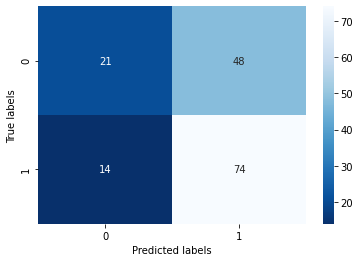

In [ ]:
clf = LogisticRegression(random_state=RANDOM_STATE).fit(X_train,y_train)
y_pred1 = clf.predict(X_test)

def scores_l(y_pred):
    acc = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    cm = confusion_matrix(y_test,y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, cmap='Blues_r',fmt='d',ax=ax);
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')

    print('recall:',round(recall,3),
          'acc:',round(acc,3),
          'precision:',round(precision,3))


scores_l(y_pred1) # построим матрицу ошибок и расчитаем метрики

Количество ошибок типа FN составило 14, а FP 48. Правильно предсказано всего (74+21) = 95 результатов.

Заказчик не хочет рисковать и хочет купить только коров, которые будут гарантированно давать вкусное молоко. Поэтому критичной является ошибка FP (когда прогноз, что корова даст вкусное молоко, ошибочен). Поэтому нужно максимально уменьшить ошибки FP и тем самым увеличить precision выборки. Попробуем решить данную задачу с помощью подбора значения порога.

In [ ]:
#найдем оптимальное значение порога для максимального значения precision

y_proba = clf.predict_proba(X_test)[:,1]

thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 15,endpoint=False)]
prec_sc = []

for i in thresholds:
    y_pred_new = (y_proba >= i).astype(int)
    precision = precision_score(y_test,y_pred_new)
    prec_sc.append(precision)

print(pd.DataFrame(zip(thresholds,prec_sc),columns=['thresholds','precision']))

#из таблицы ниже в качестве нового значения предела возьмем 0.76, при таком значении precision достигает своего максимума

new_threshold = 0.76

    thresholds  precision
0         0.10   0.560510
1         0.16   0.560510
2         0.22   0.560510
3         0.28   0.567742
4         0.34   0.578231
5         0.40   0.598592
6         0.46   0.609023
7         0.52   0.617391
8         0.58   0.648936
9         0.64   0.705882
10        0.70   0.738095
11        0.76   0.888889
12        0.82   0.500000
13        0.88   0.000000
14        0.94   0.000000


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Применение нового порога для получения предсказанных классов
y_pred_new = (y_proba >= new_threshold).astype(int)

scores_l(y_pred_new) # построим матрицу ошибок и расчитаем метрики

С выбранным порогом классификации 0.76, модель дает наилучшую из возможных метрику precision (0.889), что нам и требовалось

#### С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить

In [ ]:
#с помощью лучшей модели спрогнозируем вкус молока коров, которых фермер хочет купить

X_buy = df_cow_buy.copy()

X_buy_ohe = ohe.transform(X_buy[cat_col_names])

X_buy_ohe = pd.DataFrame(X_buy_ohe,columns=ohe.get_feature_names())

#масштабирование численных признаков

X_buy[num_col_names] = scaler.transform(X_buy[num_col_names])

#объединение признаков
X_buy = pd.concat((X_buy[num_col_names],X_buy_ohe),axis=1)

taste_proba = clf.predict_proba(X_buy)[:,1]

taste_pred_new = (taste_proba >= new_threshold).astype(int)

df_cow_buy['milk_taste'] = taste_pred_new

In [ ]:
cow_to_buy = df_cow_buy.query('yield > 6000' and 'milk_taste==1') #Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
print('Количество коров, рекомендованных к покупке:',len(cow_to_buy))
display(cow_to_buy)

Количество коров, рекомендованных к покупке: 4


,breed,pasture_type,dad_breed,dad_name,fat_content,protein_content,age,spr,efu,raw_protein,yield,milk_taste
1,вис_бик_айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532,6378.711028,1
9,рефлешн_соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,0.958744,15.276162,2019.947532,6400.540668,1
13,вис_бик_айдиал,холмистое,соверин,барин,3.42,3.075,менее_2_лет,0.958744,15.276162,2019.947532,6127.474742,1
16,вис_бик_айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,0.958744,15.276162,2019.947532,6344.707860,1


## Итоговые выводы

Целью проекта было разработать две модели, которые бы могли помочь принять решение о покупке необходимых коров.

Для этого после загрузки всех необходимых данных, полученных от заказчика мы занялись предобработкой данных для последующего анализа:

* был выявлен и удален один пропуск;
* удалено 9 явных дубликатов;
* удален ряд неявных дубликатов;
* все данные приведены к нижнему регистру;
* типы столбцов заменены на корректные;
* было найдено и удалено одно аномальное значение в столбце с удоем.

В ходе последующего анализа была обнаружена высокая корреляция между признаками yield, spr, efu (0.75-0.8)нелинейная связь между целевым признаком и protein_content, fat_content, spr; значительная линейная зависимость yield с efu и менее сильная с raw_protein. На графике с efu было обнаружено два явных кластера с границей около значения 0.92.

Также сделан вывод, что у коров возрастом более 2х лет показатели удоя очевидно выше; выше показатели удоя у коров с породой отца Айдиал и холмистым типом пастбищ.

В ходе обучения линейной регрессии было рассмотрено три модели и третья модель показала наилучший результат по метрикам r2, mae, rmse; также лучше себя показали и остатки. Данное качественное преимущество третьей модели было достигнуто в результате удаления признаков, не оказывающих влияние на целевой и также модель была улучшена путем возведения в степень показателя efu и категоризации spr. В результате на третьей модели было получено предсказание показателя удоя коров, рассматриваемых к покупке, результаты добавлены в таблицу. Заданному условию по количеству удоя удовлетворяют все коровы в представленном списке.

В рамках обучения логистической регрессии была получена матрица ошибок и показатели метрик recall, accurance и precision. Учитывая входные данные от заказчика precision выбрана в качестве приоритетной метрики, ведь ошибка fp в данном ракурсе видится более критичной (когда предсказание, что корова даст вкусное молоко ошибочно). В результате был выбран оптимальный порог классификации равный 0.76, который позволил модели достичь максимального показателя precision, равного 0.889, но логично привел к снижению остальных метрик. Предсказанное в результате на полученной модели качество молока также добавлено в таблицу.

В результате работы этих двух моделей мы смогли сделать рекомендацию по покупке необходимых коров, с учетом входных условий (удой больше 6000кг в год и дающих вкусное молоко) - таких коров получилось всего 4.

В данной задаче для улучшения качества регрессионной модели мы использовали удаление лишних (менее значимых) признаков, полимеризация одного из признаков, категоризация (биннинг), добавление дополнительного признака.

В зависимости от поставленной задачи при анализе рисков и экономических расчетов могут быть важны разные метрики: recall или precision, либо основанные на них - f1_score и тд.

Как можно еще улучшить качество моделей? В некоторых случаях может потребоваться регуляризация. Можно попробовать упростить или, наоборот, усложнить модель. Это можно сделать путем удаления лишних признаков (как было сделано в данной работе), либо путем добавления новых (например рассмотреть перемножение разных входных признаков между собой, возведение в разные степени и тд) - для подбора таких параметров есть специальные инструменты.  